# 1. Significant earthquakes since 2150 B.C.

The Significant Earthquake Database contains information on destructive earthquakes from 2150 B.C. to the present. On the top left corner, select all columns and download the entire significant earthquake data file in .tsv format by clicking the Download TSV File button. Click the variable name for more information. Read the file (e.g., earthquakes-2022-10-18_09-17-48_+0800.tsv) as an object and name it Sig_Eqs.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  # import matplotlib
import warnings
warnings.filterwarnings("ignore")     #忽略warnings

Sig_Eqs = pd.read_csv('earthquakes-2022-10-28_09-02-42_+0800.tsv', sep='\t')
Sig_Eqs.head(10)

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,NaN,-1566.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,ISRAEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,-1450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ITALY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,-1365.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
8,NaN,-1250.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,ISRAEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,-1050.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top 20 countries along with the total number of deaths.

In [2]:
q1_1 = Sig_Eqs[['Country','Total Deaths']]
nonan_q1_1 = q1_1.dropna(axis=0, how='any')  #Delete the NAN
group_q1_1 = nonan_q1_1.groupby('Country').sum()  #group
group_q1_1.sort_values('Total Deaths',ascending=False).head(20)

,Total Deaths
Country,
CHINA,2041903.0
TURKEY,927459.0
IRAN,758647.0
SYRIA,437700.0
ITALY,422678.0
JAPAN,355140.0
HAITI,323772.0
AZERBAIJAN,310119.0
INDONESIA,282153.0


#### 1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 3.0 (use column Ms as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

<AxesSubplot:xlabel='Year'>

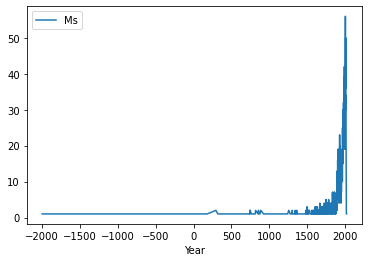

In [3]:
q1_2 = Sig_Eqs[['Year','Ms']]
nonan_q1_2 = q1_2.dropna(axis=0, how='any')  #Delete the NAN
nonan_q1_2.loc[ (nonan_q1_2['Ms'] > 3.0)].groupby('Year').count().plot()

#### 答：随着时间趋势，3级以上地震变得越来越频繁，可能由于人类在大气中排放了大量的二氧化碳,导致全球气温快速升高,南极、格陵兰和各个大陆的冰川快速融化,融化的冰雪水流入大海,导致地壳的质量在海陆之间重新分配，进而引起地壳运动，导致地震频发；另一方面，可能由于古代地震监测技术不成熟，导致数据缺失。

#### 1.3 [10 points] Write a function CountEq_LargestEq that returns (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) date and location of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [4]:
def CountEq_LargestEq (cry):            #cry为输入的国家名称
    eqnum = Sig_Eqs.loc[Sig_Eqs['Country'] == cry].Country.value_counts().item()  #返回cry国家的地震总数
    q1_3=Sig_Eqs.loc[Sig_Eqs.Country == cry]
    maxinfo=q1_3.loc[ q1_3['Ms'] == q1_3.Ms.max()]        #选取Ms最大值所在行
    maxinfo = maxinfo.fillna(0)                         #用0替换NAN
    data = []
    for i in range(maxinfo['Location Name'].ravel().shape[0]):
        data.append([eqnum,
                     maxinfo[['Year', 'Mo', 'Dy']].astype(int).astype(str).agg('-'.join, axis=1).ravel()[i],
                     maxinfo['Location Name'].ravel()[i]])
    df = pd.DataFrame(data,columns=['number',
                                    'the largest earthquake date','the largest earthquake location'])
    return df

allcry = Sig_Eqs.Country.unique()     #提取所有的国家名称
result = [] 
for i in range(1,len(allcry)):        #循环向CountEq_LargestEq输入所有国家并整合
    result.append(CountEq_LargestEq(allcry[i]))
    
frame = pd.concat(result, axis=0)
endframe = frame.sort_values("number", ascending=False)   #降序排列
endframe.reset_index(drop=True, inplace=True)     #重置index
endframe

,number,the largest earthquake date,the largest earthquake location
0,616,1920-12-16,"CHINA: GANSU PROVINCE, SHANXI PROVINCE"
1,411,869-7-13,JAPAN: SANRIKU
2,411,887-8-26,JAPAN: NANKAIDO
3,405,2004-12-26,INDONESIA: SUMATRA: ACEH: OFF WEST COAST
4,384,856-12-22,"IRAN: DAMGHAN, QUMIS"
...,...,...,...
147,1,1993-3-12,FUTUNA ISLAND
148,1,1993-8-1,SUDAN: KHARTOUM
149,1,1974-9-23,GABON
150,1,1819-8-31,NORWAY: RANA REGION: LUROY


# 2. Air temperature in Shenzhen during the past 25 years

In this problem set, we will examine how air temperature changes in Shenzhen during the past 25 years using the hourly weather data measured at the BaoAn International Airport. The data set is from NOAA Integrated Surface Dataset. Download the file Baoan_Weather_1998_2022.csv, move the .csv file to your working directory.

Read page 10-11 (POS 88-92 and POS 93-93) of the comprehensive user guide for the detailed format of the air temperature data (use column TMP). Explain how you filter the data in your report.

   ####  答：读取Baoan_Weather_1998_2022.csv文件时，把+9999设置为NAN,TMP列出现异常值将全部清洗，只使用TMP列逗号后面为1的值，其余值所在行删除，并检查是否有负值再做进一步处理。

#### [10 points] Plot monthly averaged air temperature against the observation time. Is there a trend in monthly averaged air temperature in the past 25 years?



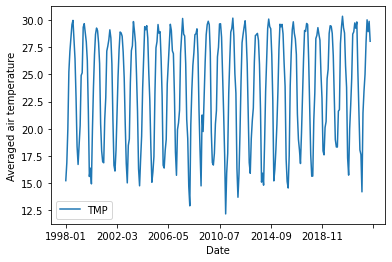

In [5]:
Baoan_Weather = pd.read_csv("Baoan_Weather_1998_2022.csv",
                            low_memory=False,
                            na_values=['+9999'])     #读取aoan_Weather_1998_2022.csv，并设置+9999为NAN
split1 = pd.DataFrame()
split2 = pd.DataFrame()
split1[['DATE','TIME']] = Baoan_Weather["DATE"].str.split('T',expand=True)
split2[['TMP','CODE']]=Baoan_Weather["TMP"].str.split(',',expand=True)
data = pd.concat([split1,split2],axis=1)                
data1 = data.loc[data.CODE == '1'][['DATE','TIME','TMP']]    #只提取TMP列逗号后面为1的值对应行
data1.TMP = data1.TMP.astype(float)/10          #对TMP进行缩小10倍
data1.DATE = pd.to_datetime(data1.DATE)
# data1.TMP.unique()     #检查是否有NAN
data1['m_y'] = data1.DATE.apply(lambda x: x.strftime('%Y-%m'))    #把data1.DATE中日期都转换成 %Y-%m 格式的字符串
data1.groupby('m_y').mean().plot()            # monthly averaged air temperature against the observation time
plt.xlabel('Date') 
plt.ylabel('Averaged air temperature')
plt.show()

####   答：过去25年内的月平均气温随观测时间有很大的季节性变化，每年的月平均温度从1月份开始都有先升高后降低的趋势。

# 3. Global collection of hurricanes

In this problem set, we will use all storms available in the IBTrACS record since 1842. Download the file ibtracs.ALL.list.v04r00.csv, move the .csv file to your working directory. Read Column Variable Descriptions for variables in the file. Examine the first few lines of the file.

In [6]:
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1],        # Modify the first line is not deleted
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.dropna(axis = 0,subset=['NAME'],inplace = True)   #删除没有NAME的hurricanes
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
211958,1945110N09160,1945,22,WP,MM,ANN,1945-04-19 12:00:00,TS,9.50000,160.300,,,,main,1704,1692,O________OOO__
211959,1945110N09160,1945,22,WP,MM,ANN,1945-04-19 15:00:00,TS,9.55082,160.098,,,,main,1701,1690,P________PPP__
211960,1945110N09160,1945,22,WP,MM,ANN,1945-04-19 18:00:00,TS,9.58375,159.932,,,,main,1690,1684,O________OPO__
211961,1945110N09160,1945,22,WP,MM,ANN,1945-04-19 21:00:00,TS,9.59044,159.819,,,,main,1684,1678,P________PPP__
211962,1945110N09160,1945,22,WP,MM,ANN,1945-04-20 00:00:00,TS,9.60000,159.700,,,,main,1678,1667,O________OOO__


#### 3.1 [5 points] Group the data on Storm Identifie (SID), report names (NAME) of the 10 largest hurricanes according to wind speed (WMO_WIND).

In [7]:
q3_1 = df[['SID','NAME','WMO_WIND']]
deal = q3_1[q3_1["WMO_WIND"]!=' ']       #选取WMO_WIND有效值对应行
deal['NAME'] = deal['NAME'].fillna(0)        #用0替换NAN
deal.WMO_WIND = deal.WMO_WIND.astype("int")
larg = deal.groupby("SID").max().sort_values('WMO_WIND',ascending=False)
larg.head(10)

,NAME,WMO_WIND
SID,,
2015293N13266,PATRICIA,185
1980214N11330,ALLEN,165
1988253N12306,GILBERT,160
2005289N18282,WILMA,160
1997253N12255,LINDA,160
2019236N10314,DORIAN,160
2009288N07267,RICK,155
2017242N16333,IRMA,155
2005261N21290,RITA,155


#### 3.2 [5 points] Make a bar chart of the wind speed (WMO_WIND) of the 20 strongest-wind hurricanes.

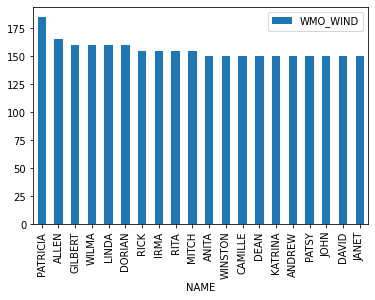

In [8]:
larg20 = larg.iloc[0:20]
larg20.set_index(["NAME"], inplace=True)   #替换index
larg20.plot(kind ='bar')
plt.show()

#### 3.3 [5 points] Plot the count of all datapoints by Basin as a bar chart.

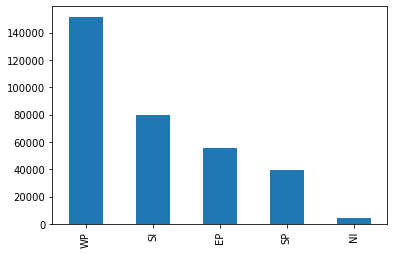

In [9]:
Basin = df['BASIN'].dropna(axis=0).value_counts().plot(kind='bar')

#### 3.4 [5 points] Make a hexbin plot of the location of datapoints in Latitude and Longitude.

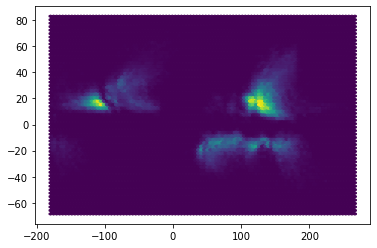

In [10]:
plt.hexbin(df.LON,df.LAT)

#### 3.5 [5 points] Find Typhoon Mangkhut (from 2018) and plot its track as a scatter plot.

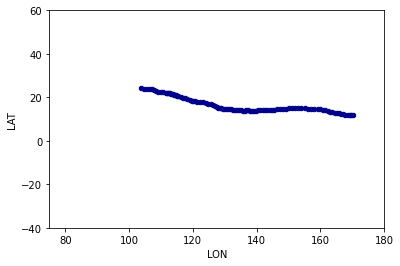

In [11]:
df.loc[(df.NAME == 'MANGKHUT') & (df.SEASON == 2018 )].plot.scatter(x='LON',
                                                                    y='LAT',
                                                                    c='DarkBlue')
plt.xlim(75, 180)
plt.ylim(-40, 60)
plt.show()

#### 3.6 [5 points] Create a filtered dataframe that contains only data since 1970 from the Western North Pacific (“WP”) and Eastern North Pacific (“EP”) Basin. Use this for the rest of the problem set.m

In [12]:
fdf = df.loc[((df.BASIN == 'EP')|(df.BASIN == 'WP')) & (df.SEASON >= 1970 )]
fdf.head(5)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,,1006,tokyo,main,1088,1088,_OO___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,,,,main,1109,1109,_PP___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,,1002,tokyo,main,1143,1143,_OO___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,,,,main,1171,1168,_PP___________
350398,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,,998,tokyo,main,1182,1179,_OO___________


#### 3.7 [5 points] Plot the number of datapoints per day.

<AxesSubplot:xlabel='ISO_TIME'>

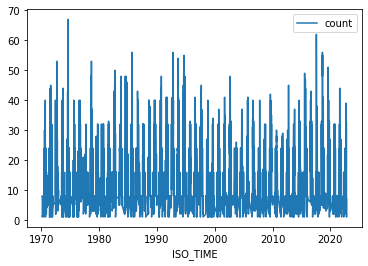

In [13]:
num = fdf.ISO_TIME.groupby(fdf.ISO_TIME.dt.date).count().reset_index(name="count")
num.set_index(["ISO_TIME"], inplace=True)
num.plot()

#### 3.8 [5 points] Calculate the climatology of datapoint counts as a function of day of year. The day of year is the sequential day number starting with day 1 on January 1st.

<AxesSubplot:xlabel='doy'>

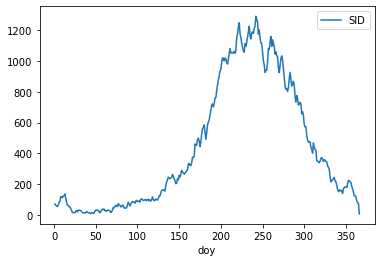

In [14]:
import calendar
q3_8 = fdf[['SID','ISO_TIME']].reset_index(drop=True)
q3_8['m_d'] = q3_8.ISO_TIME.apply(lambda x: x.strftime('%m-%d'))   #生成m_y列为月-日格式
q3_8['year'] = q3_8.ISO_TIME.dt.year
q3_8['isleap'] = q3_8.year.apply(lambda x: calendar.isleap(x))   # 判断year列是否为闰年，是返回True，否返回False
leap = q3_8.loc[q3_8.isleap == True].groupby('m_d').count()   #提取闰年的数据，并按月-日格式分组计数
noleap = q3_8.loc[q3_8.isleap == False].groupby('m_d').count()   #提取非闰年的数据，并按月-日格式分组计数
#leap.index.unique()   #检查闰年天数，319天需要进行处理
#noleap.index.unique()  #检查非闰年天数，正好365天，不需要进行处理    
leap['date'] = leap.index    #提取leap的索引作为新的一列
leap['month'] = leap.date.str.split("-",expand=True)[0].astype(int)  #把date月和日分别提出来作为一列
leap['day'] = leap.date.str.split("-",expand=True)[1].astype(int)
month_leapyear=[31,29,31,30,31,30,31,31,30,31,30,31]  
def date2doy(month,day):           #只把闰年date转换为doy
    doy=0
    for i in range(month-1):
        doy+=month_leapyear[i]
    doy+=day
    return doy
leap['doy'] = leap.apply(lambda x:date2doy(x['month'],x['day']),axis=1)#把leap中month，day列所有值分别作为参数调用date2doy，生成新一列doc
noleap['doy'] = range(1,366)  #由于noleap数据正好365天，所以直接生成1-365数据作为doy列
noleap_more = noleap[~noleap["doy"].isin(leap["doy"])][['SID','doy']].reset_index(drop=True)    #非闰年比闰年多发生地震的doy
noleap_num= noleap[noleap["doy"].isin(leap["doy"])][['SID','doy']].reset_index(drop=True)  #分别取出闰年和非闰年中共同doy的行数
leap_num=leap[leap["doy"].isin(noleap["doy"])][['SID','doy']].reset_index(drop=True)       #SID为发生hurricanes次数
doycounts = pd.DataFrame(columns=['SID','doy'])         #创建doycounts用来保存
doycounts['doy'] = leap_num['doy']
doycounts['SID'] = noleap_num['SID']+leap_num['SID']    #闰年和非闰年发生hurricanes的共同doy的次数相加
leap_more = leap[['SID','doy']].loc[leap.doy == 366]     #选取闰年doy为366的行
doycounts = pd.concat([doycounts,noleap_more,leap_more]).sort_values("doy").reset_index(drop=True)  #整理合并最终结果并排序
doycounts.plot('doy','SID')          

In [15]:
def data_count(d):                #输入一个doy，返回doy对应datapoint的总数量
    if (d>366)|(d<1):
        return 'NAN'
    else:
        return doycounts.loc[doycounts['doy']==d]['SID'].item()
data_count(int(input("Please input doy:")))

Please input doy:365


77

#### 3.9 [5 points] Calculate the anomaly of daily counts from the climatology.

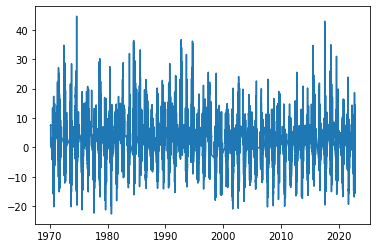

In [16]:
#因为数据只到2022.10.1，所以doy=284之后只需平均52年，之前需要平均53年，闰年13年
mean=doycounts.copy()
mean.loc[0:283,'SID']= doycounts.loc[0:283]['SID']/53
mean.loc[284:364,'SID']= doycounts.loc[284:364]['SID']/52
mean.loc[365,'SID']= doycounts.loc[365]['SID']/13

con = fdf.groupby(fdf.ISO_TIME.dt.date).count()[['SID','ISO_TIME']]
con['date'] = con.index 
con['date'] = con.date.apply(lambda x: x.strftime('%Y-%m-%d'))
con['year'] = con.date.str.split("-",expand=True)[0].astype(int)  
con['month'] = con.date.str.split("-",expand=True)[1].astype(int)
con['day'] = con.date.str.split("-",expand=True)[2].astype(int)

def date2doy(year,month,day):          #闰年和非闰年日期转换doy
            month_leapyear=[31,29,31,30,31,30,31,31,30,31,30,31]
            month_notleap= [31,28,31,30,31,30,31,31,30,31,30,31]
            doy=0

            if month==1:
                  pass
            elif year%4==0 and (year%100!=0 or year%400==0):
                  for i in range(month-1):
                          doy+=month_leapyear[i]
            else:
                  for i in range(month-1):
                          doy+=month_notleap[i]
            doy+=day            
            return func(doy)
def func(d):
    return mean.loc[mean.doy==d]['SID'].item()

con['mean']=con.apply(lambda x: date2doy(x['year'],x['month'],x['day']),axis=1)
con['anomaly']= con['SID']-con['mean']   #con.anomaly作图可视化为计算出的 the anomaly of daily counts from the climatology
plt.plot(con.anomaly)                   #对con.anomaly作图可视化

#### 3.10 [5 points] Resample the anomaly timeseries at annual resolution and plot. So which years stand out as having anomalous hurricane activity?

<AxesSubplot:xlabel='ISO_TIME'>

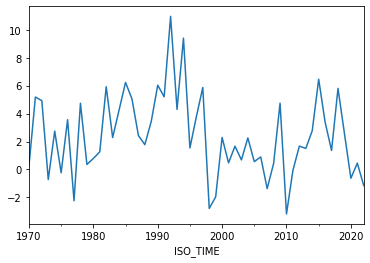

In [17]:
con.index = pd.to_datetime(con.index)   #把index转换成datetime格式
conrep = con.resample('Y').mean()   #对con以年分辨率进行重采样
conrep.anomaly.plot()       

#### 答：可以看出，最异常的年份为1992年

# 4. Explore a data set

Browse the National Centers for Environmental Information (NCEI) or Advanced Global Atmospheric Gases Experiment (AGAGE) website. Search and download a data set you are interested in. You are also welcome to use data from your group in this problem set. But the data set should be in csv, XLS, or XLSX format, and have temporal information

#### 4.1 [5 points] Load the csv, XLS, or XLSX file, and clean possible data points with missing values or bad quality.

In [18]:
df = pd.read_excel('BC emissions by country and main source category.xlsx',
                    skiprows = 4,
                    skipfooter = 7)      #不读取前四行和后七行
df.iloc[:,2:][df.iloc[:,2:]<0] =0    #对小于0的异常数据处理为0
df.fillna(0,inplace=True)     #用0替换NAN
df.head()

,Country,Sectors,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,Energy Sector,0.184000,0.18500,0.185000,0.186000,0.197000,0.192000,0.204000,0.199000,...,0.72600,0.729000,0.74600,0.7670,0.782000,0.749000,0.722000,0.623000,0.559000,0.508000
1,Afghanistan,Industrial,0.058500,0.05940,0.060000,0.061700,0.065400,0.064700,0.070200,0.069900,...,1.47000,1.550000,1.56000,1.5800,1.470000,1.470000,1.440000,1.440000,1.430000,1.400000
2,Afghanistan,Residential,5.110000,5.20000,5.290000,5.370000,5.450000,5.540000,5.670000,5.760000,...,13.00000,13.400000,13.30000,13.2000,13.400000,13.300000,13.400000,13.400000,13.300000,13.300000
3,Afghanistan,On-road motor vehicles,0.009510,0.00958,0.009930,0.009830,0.010400,0.010300,0.011300,0.010800,...,0.11900,0.125000,0.13300,0.1350,0.139000,0.136000,0.135000,0.009910,0.010100,0.009850
4,Afghanistan,Other anthropogenic,0.000952,0.00095,0.000947,0.000884,0.000959,0.000974,0.000908,0.000988,...,0.00207,0.000748,0.00127,0.0018,0.000361,0.000673,0.000537,0.000536,0.000537,0.000537


#### 4.2 [5 points] Plot the time series of a certain variable.

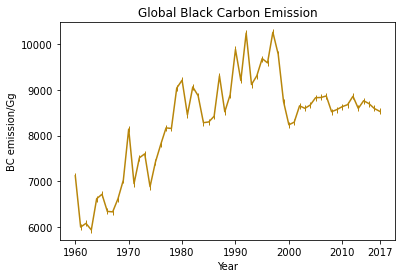

In [19]:
dftime = df.groupby('Country').sum().sum()
dftime.plot(color = 'darkgoldenrod',linewidth=1.5,marker='|')
plt.xticks([1960,1970,1980,1990,2000,2010,2017])
plt.title('Global Black Carbon Emission')        #设置标题
plt.xlabel('Year')             #设置x，y轴的标签
plt.ylabel('BC emission/Gg')
plt.show()

#### 4.3 [5 points] Conduct at least 5 simple statistical checks with the variable, and report your findings.

In [20]:
data = [dftime.max(),dftime.mean(),dftime.min(),dftime.median(),dftime.std()]
statistical=pd.DataFrame([data],columns=['max','mean','min','median','std'])
statistical.apply(lambda x:round(x,2))     #对统计结果保留两位小数

,max,mean,min,median,std
0,10260.78,8292.19,5933.31,8580.19,1073.57
